<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_runtime_sample_01_mkbahk_20241007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.1.0

## Qiskit 설치: Mac 또는 Linux ###
#%pip install 'qiskit[visualization]'==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.7 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=46ceea49a0b1e6b47f87a52f6a2e6a6a792dadc4cd10b8d74f51c0ca5227be6e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
### 다른 패키지들도 설치해봅시다
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 343.3/343.3 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.6 MB/s eta 0:00:00


In [ ]:
### Qiskit 버전을 확인합니다
import qiskit
qiskit.__version__

'1.1.0'

In [ ]:
### 다른 패키지들의 버전을 확인합니다
%pip show qiskit qiskit-ibm-runtime qiskit_aer qiskit-transpiler-service pylatexenc matplotlib

Name: qiskit
Version: 1.1.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-transpiler-service
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-aer
Version: 0.15.1

In [ ]:
### 불러오기
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator, QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

import numpy as np
import matplotlib.pyplot as plt

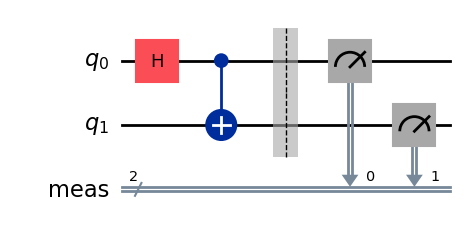

In [ ]:
qubits  = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qubits)

q0, q1 = qubits

circuit.h(q0)
circuit.cx(q0, q1)
circuit.measure_all()

circuit.draw("mpl")

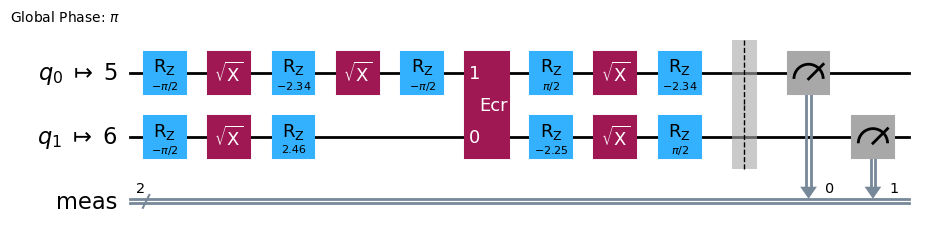

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum", token="16d422f9c8fd7a34c34fa04292a3b27a4ebe822dd653724757d34fb7737a6e80f652b48092bb9dcfe2d295c3573298b01b8d95ea9693d33e106bb30591e77817")
backend = service.backend('ibm_brisbane')
pass_manager = generate_preset_pass_manager(optimization_level=3, backend=backend)
isa_circuit = pass_manager.run(circuit)

isa_circuit.draw("mpl", idle_wires=False)

In [ ]:
# The ZZ applies a Z operator on qubit 0, and a Z operator on qubit 1
ZZ = SparsePauliOp('ZZ')

# The ZI applies a Z operator on qubit 0, and an Identity operator on qubit 1
ZI = SparsePauliOp('ZI')

# The IX applies an Identity operator on qubit 0, and an X operator on qubit 1
IX = SparsePauliOp('IX')

### Write your code below here ###
### Follow the same naming convention we used above

### SOLUTION
IZ = SparsePauliOp('IZ')
XX = SparsePauliOp('XX')
XI = SparsePauliOp('XI')

## Don't change any code past this line, but remember to run the cell.

#observables = [IZ, IX, ZI, XI, ZZ, XX]
observables = [IZ, IX]

In [ ]:
# Estimator를 설정합니다
#estimator = Estimator(backend=AerSimulator())
estimator = Estimator(backend)
# Estimator로 회로를 실행합니다

pub = (isa_circuit, observables)

job = estimator.run(pubs=[pub])

ValueError: The number of qubits of the circuit (127) does not match the number of qubits of the (0,)-th observable (2).


##4단계: 결과값 후처리

Qiskit pattern의 마지막 단계는 양자 회로의 실행 결과를 처리하고, 분석하고, 시각화하는 단계입니다.

이것을 수행하는 데에는 여러 가지 방법이 있습니다. IBM Quantum Challenge에서는 이 단계를 수행하는 다양한 방법들을 보여드릴 예정입니다. 새로운 것을 배우는 것은 항상 즐거우니까요!

여기서는 데이터를 수집하고 그래프로 나타내는 작업을 해보겠습니다.


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

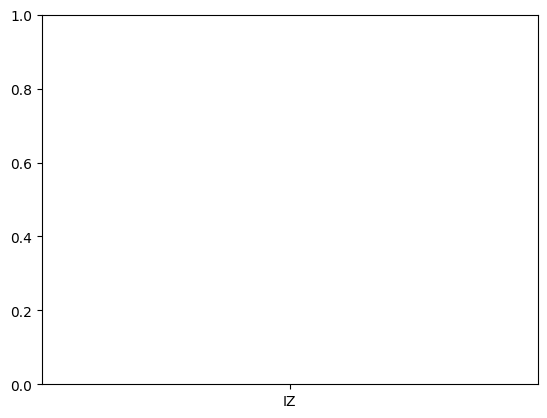

In [ ]:
# Collect the data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result()[0].data.evs

# Set up our graph
container = plt.plot(data, values, '-o')

# Label each axis
plt.xlabel('Observables')
plt.ylabel('Values')

# Draw the final graph
plt.show()


출력된 그래프에서 두 큐비트를 모두 측정하는 ZZ와 XX의 측정값은 1에, 다른 연산자의 측정값은 0에 가까워야 합니다. 이것은 이 상태가 얽힘 상태에 있다는 것을 보여줍니다. 잘 하셨습니다.

현재 그래프는 선형으로 출력되고 있지만, 같은 데이터를 막대 그래프로도 시각화할 수 있습니다.


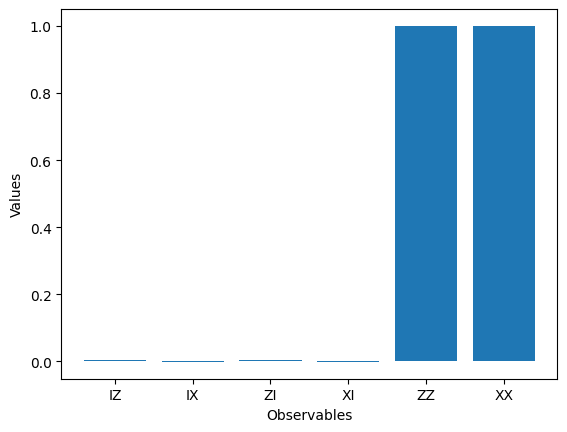

In [ ]:
container = plt.bar(data, values, width=0.8)

plt.xlabel('Observables')
plt.ylabel('Values')

plt.show()